# 1

## Implementación de librerias

In [12]:
import numpy as np
from PIL import Image
from Problem import Problem

# 1.1

## Funciones de descretizacion

In [13]:
import numpy as np
from PIL import Image

def colorSimilar(color, referencia, tolerancia=20):
    return all(abs(int(c1) - int(c2)) <= tolerancia for c1, c2 in zip(color, referencia))


# Función para clasificar una celda según el color predominante
def clasificarCelda(pixeles):
    conteo = {"0": 0, "1": 0, "S": 0, "G": 0}

    BLANCO = (255, 255, 255)
    NEGRO = (0, 0, 0)
    ROJO = (255, 0, 0)
    VERDE = (0, 255, 0)

    for fila in pixeles:
        for r, g, b in fila:
            if colorSimilar((r, g, b), BLANCO):
                conteo["0"] += 1
            elif colorSimilar((r, g, b), NEGRO):
                conteo["1"] += 1
            elif colorSimilar((r, g, b), ROJO):
                conteo["S"] += 1
            elif colorSimilar((r, g, b), VERDE):
                conteo["G"] += 1

    return max(conteo, key=conteo.get)

def discretizar_imagen(ruta_imagen, tamano_celda):
    imagen = Image.open(ruta_imagen).convert("RGB")
    pixeles = np.array(imagen)
    alto, ancho, _ = pixeles.shape

    filas = alto // tamano_celda
    columnas = ancho // tamano_celda

    laberinto = np.zeros((filas, columnas), dtype=str)

    for y in range(filas):
        for x in range(columnas):
            celda_pixeles = pixeles[y * tamano_celda:(y + 1) * tamano_celda, 
                                    x * tamano_celda:(x + 1) * tamano_celda]

            laberinto[y, x] = clasificarCelda(celda_pixeles)

    return laberinto


## Aplicacion

In [14]:
# Imagen de prueba
ruta = "img/Prueba Lab1.bmp"
ruta2 = "img/Test.bmp"
ruta3 = "img/Test.bmp"
ruta4 = "img/turing.bmp"


# Tamaño de pixel definido
tamano_celda = 10  

# Convertir la imagen en una matriz de celdas
matriz_laberinto = discretizar_imagen(ruta, tamano_celda)
matriz_laberinto2 = discretizar_imagen(ruta2, tamano_celda)
matriz_laberinto3 = discretizar_imagen(ruta3, tamano_celda)
matriz_laberinto4 = discretizar_imagen(ruta4, tamano_celda)

# Mostrar la matriz discretizada
print("\nMatriz del laberinto:")
for fila in matriz_laberinto:
    print(" ".join(fila))


Matriz del laberinto:
1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
0 0 0 0 G G G 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
0 0 0 0 G G G 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0
0 0 0 0 G G G 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0
0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0

In [15]:
class MazeProblem(Problem):
    def __init__(self, maze_matrix):
        self.maze = maze_matrix
        self.initial_state = self.find_start()
        self.goal_states = self.find_goals()
        super().__init__(self.initial_state)

    def find_start(self):
        for y, row in enumerate(self.maze):
            for x, value in enumerate(row):
                if value == 'S':
                    return (y, x)
        return None

    def find_goals(self):
        goals = []
        for y, row in enumerate(self.maze):
            for x, value in enumerate(row):
                if value == 'G':
                    goals.append((y, x))
        return goals

    def actions(self, state):
        y, x = state
        actions = []

        if y > 0 and self.maze[y - 1, x] != '1':
            actions.append("UP")
        if y < self.maze.shape[0] - 1 and self.maze[y + 1, x] != '1':
            actions.append("DOWN")
        if x > 0 and self.maze[y, x - 1] != '1':
            actions.append("LEFT")
        if x < self.maze.shape[1] - 1 and self.maze[y, x + 1] != '1':
            actions.append("RIGHT")

        return actions

    def result(self, state, action):
        y, x = state
        if action == "UP":
            return (y - 1, x)
        elif action == "DOWN":
            return (y + 1, x)
        elif action == "LEFT":
            return (y, x - 1)
        elif action == "RIGHT":
            return (y, x + 1)
        return state

    def goal_test(self, state):
        return state in self.goal_states

    def step_cost(self, state, action, new_state):
        # Costo uniforme
        return 1 
    
    def manthattan_distance(self, state):
        y, x = state
        return min(abs(y - gy) + abs(x - gx) for gy, gx in self.goal_states)

    def euclidean_distance(self, state):
        y, x = state
        return min(((y - gy) ** 2 + (x - gx) ** 2) ** 0.5 for gy, gx in self.goal_states)


In [16]:
problema = MazeProblem(matriz_laberinto)

print("Estado inicial:", problema.initial_state)
print("Estados objetivo:", problema.goal_states)
print("Acciones posibles desde el estado inicial:", problema.actions(problema.initial_state))

Estado inicial: (49, 49)
Estados objetivo: [(5, 4), (5, 5), (5, 6), (6, 4), (6, 5), (6, 6), (7, 4), (7, 5), (7, 6)]
Acciones posibles desde el estado inicial: ['UP', 'DOWN', 'LEFT', 'RIGHT']


-----------

# 1.3 Graph search 
Construir un algorimo generico familia= de graphSearch. Este recibirá de parámetro una instancia del framework de problemas. Sobre esta familia genérica, implemente los siguientes algoritmos: 

● Breadth First Search (BFS) 

● Depth First Search (DFS) 

● A*: escoja dos heurísticas distintas, y justifique su selección. 

In [17]:


from collections import deque
# busqueda en amplitud
class BreadthFirstSearch:
    def __init__(self, problem):
        self.problem = problem
        #fontrera con el estawdo inicial
        self.frontier = deque([problem.initial_state])
        self.explored = set() #conjunto de esatos explorados
        self.path = {problem.initial_state: None} #diccionario para reconstruir el camino
        self.solution = None

    #buscar el estado objetivo
    def search(self):
        while self.frontier:
            state = self.frontier.popleft()

            if self.problem.goal_test(state):
                return self.reconstruct_path(state)
            
            self.explored.add(state)

            for action in self.problem.actions(state):
                child = self.problem.result(state, action)
                if child not in self.explored and child not in self.frontier:
                    self.frontier.append(child)
                    self.path[child] = (state, action)

        return None


    #reconstruir el camino
    def reconstruct_path(self, state):
        actions = []
        while self.path[state]:
            state, action = self.path[state]
            actions.append(action)
        actions.reverse()
        return actions

In [ ]:
problema2 = MazeProblem(matriz_laberinto2)

bfs = BreadthFirstSearch(problema2)
acciones2 = bfs.search()

print("Camino encontrado con BFS: ", acciones2)


Camino encontrado con BFS:  ['UP', 'UP', 'UP', 'UP', 'UP', 'UP', 'UP', 'UP', 'UP', 'LEFT', 'LEFT', 'LEFT', 'LEFT', 'LEFT', 'LEFT', 'LEFT', 'LEFT', 'LEFT', 'LEFT', 'UP', 'LEFT', 'UP', 'UP', 'UP', 'UP', 'LEFT', 'LEFT', 'LEFT', 'LEFT', 'UP', 'LEFT', 'UP', 'LEFT', 'LEFT', 'UP', 'LEFT', 'LEFT', 'UP', 'LEFT', 'UP', 'LEFT', 'UP', 'UP', 'UP', 'UP', 'LEFT', 'LEFT', 'LEFT', 'LEFT', 'LEFT', 'LEFT', 'LEFT', 'LEFT', 'LEFT', 'LEFT', 'LEFT', 'LEFT', 'LEFT', 'LEFT', 'LEFT']


In [52]:


# busqueda en profundidad
#este funciona con pilas
class DepthFirstSearch:
    def __init__(self, problem):
        self.problem = problem
        self.frontier = [problem.initial_state]
        self.explored = set()
        self.path = {problem.initial_state: None}
        self.solution = None

    #buscar el estado objetivo
    def search(self):
        while self.frontier:
            state = self.frontier.pop()

            if self.problem.goal_test(state):
                return self.reconstruct_path(state)
            
            self.explored.add(state)

            for action in self.problem.actions(state):
                child = self.problem.result(state, action)
                if child not in self.explored and child not in self.frontier:
                    self.frontier.append(child)
                    self.path[child] = (state, action)

        return None
    
    #reconstruir el camino
    def reconstruct_path(self, state):
        actions = []
        while self.path[state] is not None:
            state, action = self.path[state]
            actions.append(action)
        actions.reverse()
        return actions
    

In [53]:
problema3 = MazeProblem(matriz_laberinto2)

dfs = DepthFirstSearch(problema3)

acciones3 = dfs.search()

print("Camino encontrado con DFS: ", acciones3)


Camino encontrado con DFS:  ['RIGHT', 'DOWN', 'DOWN', 'LEFT', 'LEFT', 'LEFT', 'LEFT', 'LEFT', 'LEFT', 'LEFT', 'LEFT', 'LEFT', 'LEFT', 'LEFT', 'LEFT', 'LEFT', 'LEFT', 'LEFT', 'LEFT', 'LEFT', 'LEFT', 'LEFT', 'UP', 'UP', 'RIGHT', 'RIGHT', 'RIGHT', 'RIGHT', 'UP', 'UP', 'LEFT', 'LEFT', 'LEFT', 'UP', 'UP', 'RIGHT', 'RIGHT', 'RIGHT', 'UP', 'RIGHT', 'UP', 'RIGHT', 'RIGHT', 'RIGHT', 'RIGHT', 'RIGHT', 'RIGHT', 'RIGHT', 'RIGHT', 'RIGHT', 'RIGHT', 'RIGHT', 'RIGHT', 'RIGHT', 'RIGHT', 'UP', 'UP', 'LEFT', 'LEFT', 'LEFT', 'LEFT', 'LEFT', 'LEFT', 'LEFT', 'LEFT', 'LEFT', 'LEFT', 'LEFT', 'LEFT', 'LEFT', 'LEFT', 'LEFT', 'LEFT', 'LEFT', 'LEFT', 'LEFT', 'LEFT', 'UP', 'UP', 'RIGHT', 'RIGHT', 'RIGHT', 'RIGHT', 'RIGHT', 'RIGHT', 'RIGHT', 'RIGHT', 'UP', 'UP', 'RIGHT', 'UP', 'RIGHT', 'UP', 'UP', 'RIGHT', 'UP', 'RIGHT', 'UP', 'RIGHT', 'UP', 'RIGHT', 'UP', 'RIGHT', 'RIGHT', 'RIGHT', 'RIGHT', 'RIGHT', 'RIGHT', 'RIGHT', 'RIGHT', 'RIGHT', 'RIGHT', 'RIGHT', 'RIGHT', 'RIGHT', 'RIGHT', 'RIGHT', 'RIGHT', 'RIGHT', 'UP', '

A* Heuristica: Manhattan Distance
se escogio, debido a que en el link (https://www.geeksforgeeks.org/a-search-algorithm/) proporcionado en los modulos de la clase , se explica de manera clara y sencilla la implementacion de este algoritmo, entonces se escogio este porque se miraba mas facil de implementar y entender.

In [21]:
# 1. A* Heuristica: Manhattan Distance 

#esta en la clase de MazeProblem el metodo

acciones = dfs.search()
estado_actual = problema3.initial_state

heuristicas =[]

for accion in acciones:
	estado_actual = problema3.result(estado_actual, accion)
	# print(estado_actual)
	heuristica = problema3.manthattan_distance(estado_actual)
	heuristicas.append(heuristica)
print("distancias de manhattan: ", heuristicas)



distancias de manhattan:  [39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 51, 50, 49, 48, 47, 46, 45, 44, 43, 42, 43, 44, 45, 46, 45, 44, 43, 42, 41, 40, 39, 40, 41, 42, 41, 42, 41, 42, 43, 44, 43, 42, 41, 40, 39, 38, 37, 36, 35, 34, 33, 32, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 41, 40, 39, 38, 37, 36, 35, 34, 33, 32, 31, 32, 33, 34, 35, 36, 37, 38, 39, 38, 37, 38, 37, 36, 35, 34, 33, 32, 31, 30, 29, 28, 27, 26, 25, 24, 23, 22, 21, 20, 19, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 26, 25, 24, 23, 22, 21, 20, 19, 18, 17, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 28, 27, 26, 25, 24, 23, 23, 22, 23, 22, 23, 22, 23, 22, 21, 22, 21, 22, 21, 20, 19, 18, 17, 16, 15, 14, 13, 14, 15, 16, 17, 18, 17, 16, 15, 14, 13, 12, 11, 10, 9, 8, 7, 6, 5, 4, 3, 2, 1, 1, 0]


A* Heuristica Euclidean Distance, se escogio por la misma razon que la de Manthattan Distance.

In [22]:
#este tambien esta implementado en la clase de maze problem
acciones = dfs.search()
estado_actual = problema3.initial_state

heuristicas =[]

for accion in acciones:
	estado_actual = problema3.result(estado_actual, accion)
	# print(estado_actual)
	heuristica = problema3.euclidean_distance(estado_actual)
	heuristicas.append(heuristica)
print("distancias de euclidean: ", heuristicas)


distancias de euclidean:  [37.05401462729781, 38.05259518088089, 39.05124837953327, 39.11521443121589, 39.20459156782532, 39.319206502675, 39.45883931389772, 39.6232255123179, 39.81205847478876, 39.824615503479755, 39.05124837953327, 38.28837943815329, 37.53664875824692, 36.796738985948195, 36.069377593742864, 35.35533905932738, 34.655446902326915, 33.97057550292606, 33.301651610693426, 32.64965543462902, 32.01562118716424, 31.400636936215164, 30.610455730027933, 29.832867780352597, 30.479501308256342, 31.144823004794873, 31.827660925679098, 32.526911934581186, 31.827660925679098, 31.144823004794873, 30.4138126514911, 29.698484809834994, 29.0, 28.284271247461902, 27.586228448267445, 28.319604517012593, 29.068883707497267, 29.832867780352597, 29.206163733020468, 30.0, 29.410882339705484, 30.23243291566195, 31.064449134018133, 31.906112267087632, 32.7566787083184, 32.89376840679705, 32.57299494980466, 32.28002478313795, 32.01562118716424, 31.78049716414141, 31.575306807693888, 31.4006369

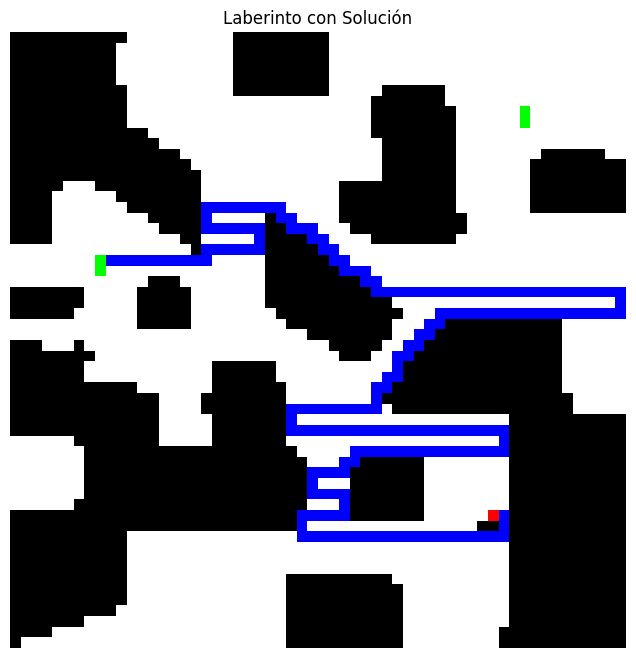

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

def visualize(maze, endPoints, startPoint, solution=None):
    height, width = maze.shape
    color_labyrinth = np.zeros((height, width, 3), dtype=np.uint8)
    
    # Asigna colores básicos
    color_labyrinth[maze == "0"] = [255, 255, 255]  # Blanco para los espacios transitables
    color_labyrinth[maze == "1"] = [0, 0, 0]        # Negro para las paredes
    
    # Posición inicial
    current_position = list(startPoint)
    color_labyrinth[current_position[0], current_position[1]] = [255, 0, 0]  # Rojo
    
    # Dibujar la solución en azul
    if solution:
        for move in solution:
            if move == 'RIGHT':
                current_position[1] += 1
            elif move == 'LEFT':
                current_position[1] -= 1
            elif move == 'UP':
                current_position[0] -= 1
            elif move == 'DOWN':
                current_position[0] += 1
            
            # Marcar el camino en azul
            color_labyrinth[current_position[0], current_position[1]] = [0, 0, 255]

    # Marcar los puntos finales en verde
    for goal in endPoints:
        color_labyrinth[goal[0], goal[1]] = [0, 255, 0]
    
    # Graficar
    plt.figure(figsize=(8, 8))
    plt.imshow(color_labyrinth, interpolation='nearest')
    plt.title("Laberinto con Solución")
    plt.axis('off')
    plt.show()

visualize(problema3.maze, problema3.goal_states, problema3.initial_state, acciones3)
visualize(problema2.maze, problema2.goal_states, problema2.initial_state, acciones3)